# Fraud Detection using various supervised and hybrid models

## 1. Data Importation:

Importing libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import time

Importing and visualizing the Dataset

In [ ]:
#Importing Data
import pandas as pd
data=pd.read_csv("creditcard.csv")
print("Dataset shape:", data.shape)

Dataset shape: (284807, 31)


In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Get important infos and insights about the dataset

In [ ]:
print("Dataset Basic Info")
data.info()

Dataset Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  floa

In [ ]:
print("Statistical Summary")
data.describe()

Statistical Summary


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## 2. Data preprocessing

In [ ]:
print('Minimum amount of transaction in our dataset is:', min(data.Amount))
print('Maximum amount of transaction in our dataset is:', max(data.Amount))

Minimum amount of transaction in our dataset is: 0.0
Maximum amount of transaction in our dataset is: 25691.16


In [ ]:
from os import WCOREDUMP
total_transactions = len(data)
normal = len(data[data.Class == 0])
frauded = len(data[data.Class == 1])
fraud_percent = round((frauded/normal)*100, 2)
print('Number of total Trnsactions is ',total_transactions)
print('Number of Normal Transactions are ',normal)
print('Number of fraudulent Transactions are ',frauded)
print('Percentage of fraud Transactions is',fraud_percent)
print('maximum of the work we hab')

Number of total Trnsactions is  284807
Number of Normal Transactions are  284315
Number of fraudulent Transactions are  492
Percentage of fraud Transactions is 0.17
maximum of the work we hab


The vast majority of transactions are normal (284315), while only a tiny fraction (492) are fraudulent. This difference shows the imbalanced nature of the dataset.

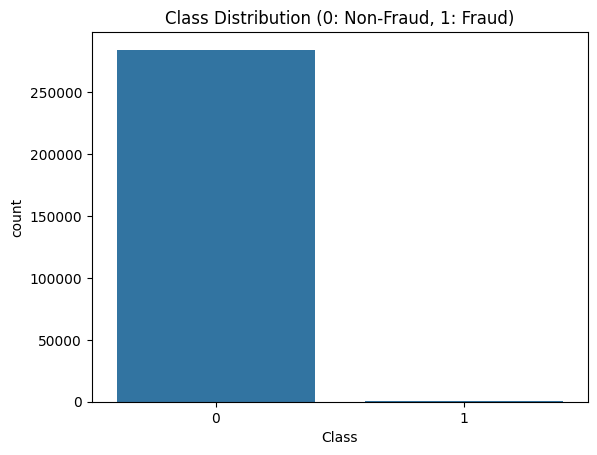

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot of class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

Most features show very weak correlation with each other and the target variable (Class), indicating limited linear relationships between them.

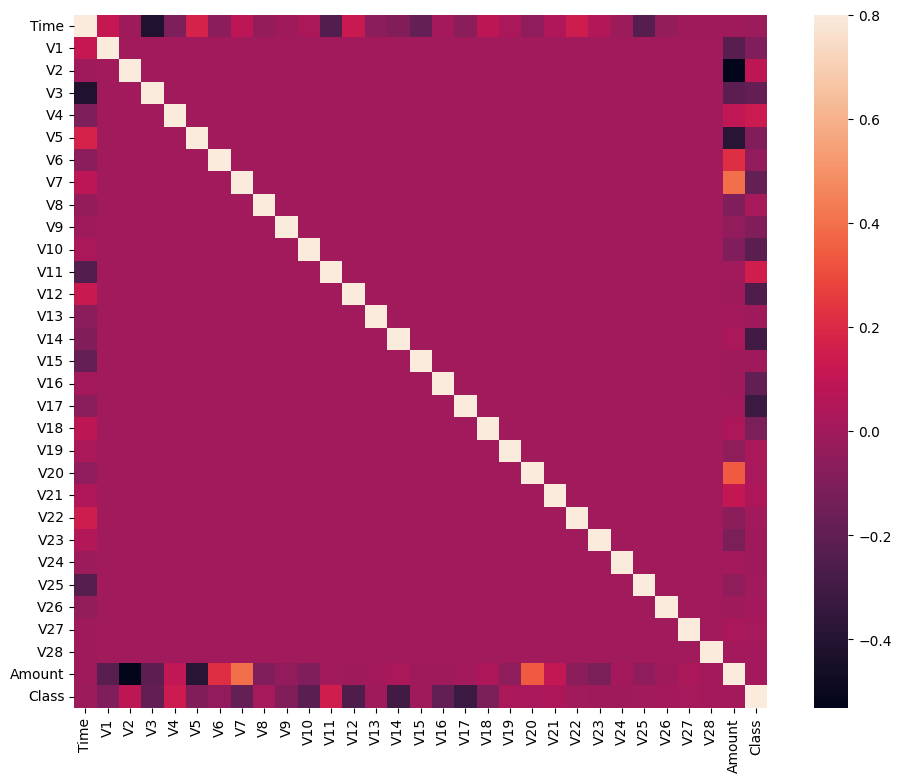

In [ ]:
# Correlation metrics
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat , vmax= .8 ,square = True)
plt.show()

The heatmap reveals a dominant pattern of negative correlations, particularly between the 'Time' features (V1 through V28) and the 'Amount Class' feature. This suggests an inverse relationship between these variables, where higher 'Time' values tend to be associated with lower 'Amount Class' values, and vice versa.
Additionally, there are some weaker negative correlations observed between the 'Time' features and other variables in the dataset. The heatmap provides a concise, visual summary of the correlation structure, which can inform further data exploration and the development of predictive models.

In [ ]:
data.shape

(284807, 31)

Data normalization of the feature (Amount) using standardScaler

In [ ]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

In our case Time feature is an external factor or variable does not influent our dataset, that's why we will drop it

In [ ]:
#Remonving Time feature
data.drop(['Time'], axis=1, inplace=True)

In [ ]:
#Verfying the shape after removing time feature
data.shape

(284807, 30)

After standarzing our dataset and removing 'Time' feature, now we will remove the duplicated values in order to avoid the bad and incorrect performance and evaluation of pour dataset

In [ ]:
duplicate_rows = data[data.duplicated()]
num_duplicates = len(duplicate_rows)
print(f"Number of duplicate data: {num_duplicates}")

Number of duplicate data: 9144


In [ ]:
#drop duplicated values
data.drop_duplicates(inplace=True)

In [ ]:
data.shape

(275663, 30)

About 9144 duplicated values has been removed.

Finding if there is any missing values (NaN) or Infinite values and replace them with 0.

In [ ]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0, inplace=True)

Looking for the Null values.

In [ ]:
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,V1,V2,Amount,V28,V27,V26,V25,V24,V23,V22,...,V11,V10,V9,V8,V7,V6,V5,V4,V3,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There is no Null values in this dataset soo no need to drop them.

Now after scaling,reshaping and droping useless features and duplicated values. We can say that we ready for taining and splitting our dataset.

In [ ]:
# Defininng our variables
X = data.drop('Class', axis = 1).values
y = data['Class'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

Here we split our dataset into 70% for raining and 30% for testing.

## 3. Building our Models

### **Using Support Vector Algorithm (SVM)**

Scaling all features using StandardScaler to standardize their values is very important for SVM.

In [ ]:
#Scale all the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We can use SMOTE to oversample the minority class (fraudulent transactions) and balance the dataset, but after various tests it only effected our results negatively.

In [ ]:
# # Apply SMOTE for oversampling with a moderate ratio
# smote = SMOTE(sampling_strategy=0.3, random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

**SVM model optimal parameters we found:**
- **C:** Controls how strictly the SVM tries to avoid misclassifications. Lower values are more forgiving.
- **kernel:** The way the SVM views your data. 'linear' is like drawing a straight line to separate the data.
- **probability:** Allows you to get the confidence of the SVM's predictions.
- **class_weight:** Gives more importance to the 'fraud' class (1) because it's less common in the data. This helps the model focus on finding those important cases.

In [ ]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', probability=True, class_weight={0: 1, 1: 5})
svm.fit(X_train, y_train)

SVC(class_weight={0: 1, 1: 5}, kernel='linear', probability=True)

In [ ]:
svm_predt = svm.predict(X_test)

- **Accuracy:** 0.9993 - Very high accuracy, indicating the model is correctly classifying most transactions.
- **F1 Score:** 0.79 - A decent F1 score, suggesting a balance between precision and recall, but with room for improvement.

In [ ]:
from sklearn import metrics
print('Accuracy score for SVM Model :',metrics.accuracy_score(y_test, svm_predt))
print('F1 score for SVM model :', metrics.f1_score(y_test, svm_predt))

Accuracy score for SVM Model : 0.9992623852767264
F1 score for SVM model : 0.7859649122807018


- **True Negatives (TN):** 82526 - Correctly classified normal transactions.
- **False Positives (FP):** 28 - Incorrectly classified normal transactions as fraudulent.
- **False Negatives (FN):** 33 - Incorrectly classified fraudulent transactions as normal.
- **True Positives (TP):** 112 - Correctly classified fraudulent transactions.

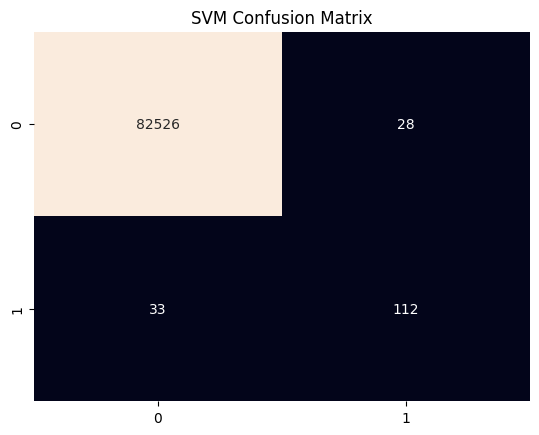

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, svm_predt)

# Create the heatmap with a light blue colormap
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('SVM Confusion Matrix')
plt.savefig('svm_con_mat')
plt.show()

- **Precision:** 0.80 - Out of all the transactions predicted as fraudulent, 80% were actually fraudulent.
- **Recall:** 0.77 - The model correctly identified 77% of the actual fraudulent transactions.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, svm_predt)
recall = recall_score(y_test, svm_predt)
f1 = f1_score(y_test, svm_predt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.80, Recall: 0.77, F1 Score: 0.79


### Visualizing the hyperplane for the SVM model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
from sklearn.svm import SVC

# Create and train the SVM model
svm = SVC(C=1.0, kernel='linear', class_weight={0: 1, 1: 5}) # Use a linear kernel for visualization
svm.fit(X_train_pca, y_train)

SVC(class_weight={0: 1, 1: 5}, kernel='linear')

In [ ]:
# Create a meshgrid for plotting
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict on the meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.8) # Decision boundary
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k') # Data points
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Hyperplane Visualization with PCA')
plt.show()

### Adding anomaly detection feature to SVM for better fraud detection:

In [ ]:
from sklearn.ensemble import IsolationForest

# Step 1: Train IsolationForest and get predictions
iso_forest = IsolationForest(contamination=0.00173, random_state=42)
iso_forest.fit(X_train)

IsolationForest(contamination=0.00173, random_state=42)

In [ ]:
# Step 2: Add predictions as a new feature or filter data
isolation_labels = iso_forest.predict(X_train)

In [ ]:
# Filter normal cases to refine non-fraud data
X_train_filtered = X_train[isolation_labels == 1]
y_train_filtered = y_train[isolation_labels == 1]

In [ ]:
print("Training SVM model...")
start_time = time.time()
model = SVC(kernel='rbf', C=1.0, class_weight='balanced') # balanced class weights to handle any remaining imbalance
model.fit(X_train_filtered, y_train_filtered)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")

Training SVM model...
Training completed in 106.86 seconds


In [ ]:
#Make predictions
y_pred_ASVM = model.predict(X_test)

In [ ]:
from sklearn import metrics
print('Accuracy score for SVM Model :',metrics.accuracy_score(y_test, y_pred_ASVM))
print('F1 score for SVM model :', metrics.f1_score(y_test, y_pred_ASVM))

Accuracy score for SVM Model : 0.9677747010241962
F1 score for SVM model : 0.08888888888888889


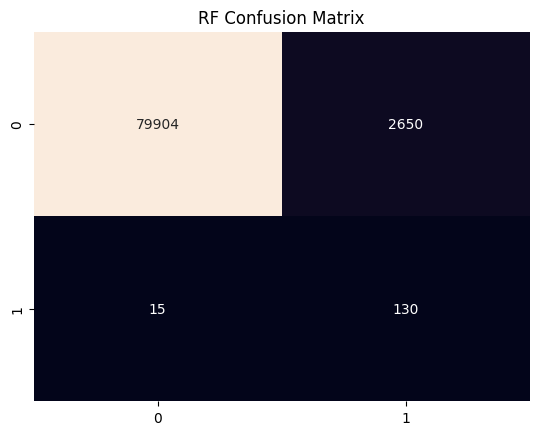

In [ ]:
cm = confusion_matrix(y_test, y_pred_ASVM)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()

- The model has prioritized recall (catching most fraud), but at the cost of a very low precision. This means it generates a large number of false alarms (FP).
- The anomaly detection component is likely contributing to the high number of false positives. It might be flagging many normal transactions as anomalies, leading to incorrect fraud predictions.
- The inherent class imbalance is still a factor. While the recall is high, the low precision indicates that the model struggles to accurately distinguish fraud from normal transactions within the flagged anomalies.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_ASVM)
recall = recall_score(y_test, y_pred_ASVM)
f1 = f1_score(y_test, y_pred_ASVM)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.05, Recall: 0.90, F1 Score: 0.09


### Random Forest Model

***1st parameter set:***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(
    n_estimators=200,  # Increase the number of trees for potentially better performance
    max_depth=10,  # Limit tree depth to prevent overfitting (adjust if needed)
    min_samples_split=5,  # Prevent splits on very small subsets
    min_samples_leaf=2,   # Ensure leaves have at least 2 samples
    max_features='sqrt',  # Use the square root of the number of features for each split
    random_state=42  # Set a random state for reproducibility
)

rforest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
rforest_predt = rforest.predict(X_test)

- **Accuracy:** 0.9994 - Very high accuracy, indicating the model correctly classifies most transactions.
- **F1 Score:** 0.81 - A good F1 score, showing a decent balance between precision and recall.
- **Precision:** 0.94 - Out of all the transactions predicted as fraudulent, 94% were actually fraudulent. This is very high.
- **Recall:** 0.72 - The model correctly identified 72% of the actual fraudulent transactions.

In [ ]:
from sklearn import metrics
print('Accuracy score for Random Forest Model :',metrics.accuracy_score(y_test, rforest_predt))
print('F1 score for Random Forest model :', metrics.f1_score(y_test, rforest_predt))

Accuracy score for Random Forest Model : 0.9994195818570962
F1 score for Random Forest model : 0.8125


- **True Negatives (TN):** 82547 - Correctly classified normal transactions.
- **False Positives (FP):** 7 - Incorrectly classified normal transactions as fraudulent. This is very low.
- **False Negatives (FN):** 41 - Incorrectly classified fraudulent transactions as normal.
- **True Positives (TP):** 104 - Correctly classified fraudulent transactions.

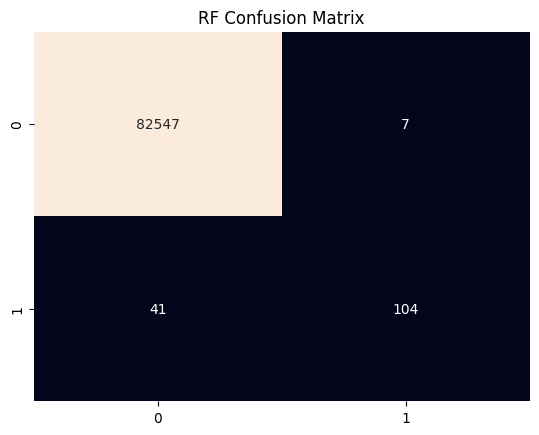

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, rforest_predt)

# Create the heatmap with a light blue colormap
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, rforest_predt)
recall = recall_score(y_test, rforest_predt)
f1 = f1_score(y_test, rforest_predt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.94, Recall: 0.72, F1 Score: 0.81


High Accuracy and Precision: The model has excellent accuracy and precision, indicating it's very good at avoiding false alarms (FP).  
Recall is a Concern: While the recall is decent, it's still lower than the precision. This means the model is missing some fraudulent transactions (41 FN).

***2nd parameter set:***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(
    n_estimators=200, # Increased number of trees for more robust prediction
    max_depth=6,     # Slightly deeper trees to capture more complex patterns
    class_weight='balanced',   # Helps with imbalanced datasets
    max_features='sqrt', # Limit overfitting by reducing max features
    min_samples_split=10, # Minimum samples to split an internal node
    min_samples_leaf=4, # Minimum samples in a leaf node
    random_state=42, # For reproducibility
)

rforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=6, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=200, random_state=42)

In [ ]:
rforest_predt = rforest.predict(X_test)

- **Accuracy:** 0.9987 - Still a very high accuracy, but slightly lower than the first model.
- **F1 Score:** 0.69 - Lower F1 score compared to the first model, suggesting a less balanced performance.
- **Precision:** 0.60 - Out of all the transactions predicted as fraudulent, 60% were actually fraudulent. This is significantly lower than the first model.
- **Recall:** 0.81 - The model correctly identified 81% of the actual fraudulent transactions. This is higher than the first model.

In [ ]:
from sklearn import metrics
print('Accuracy score for Random Forest Model :',metrics.accuracy_score(y_test, rforest_predt))
print('F1 score for Random Forest model :', metrics.f1_score(y_test, rforest_predt))

Accuracy score for Random Forest Model : 0.998730335312398
F1 score for Random Forest model : 0.6902654867256637


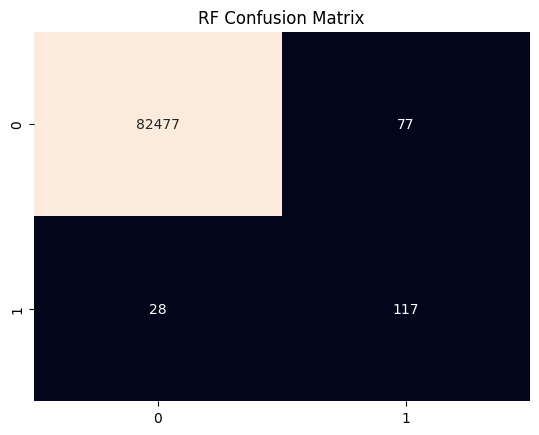

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, rforest_predt)

# Create the heatmap with a light blue colormap
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, rforest_predt)
recall = recall_score(y_test, rforest_predt)
f1 = f1_score(y_test, rforest_predt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.60, Recall: 0.81, F1 Score: 0.69


**Trade-off for Recall:** The second model has prioritized recall over precision. It's catching more fraudulent transactions (higher recall) but at the cost of more false alarms (lower precision).  
**Hyperparameter Changes:** The changes in hyperparameters (likely increasing tree depth or decreasing minimum samples per leaf) have led to this shift in performance.

 **Focus on Fraud Detection:** While lower precision is a concern, the higher recall might be desirable in fraud detection, depending on the cost of missing fraud versus the cost of false alarms.

***3rd parameter set:***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rforest = RandomForestClassifier(
    n_estimators=200,           # A good balance between performance and training time
    max_depth=10,               # Limits tree growth to prevent overfitting; can try between 8-12
    min_samples_split=5,        # Forces nodes to have at least 5 samples before a split
    min_samples_leaf=2,         # Helps prevent splits with very few samples
    class_weight='balanced',    # Handles class imbalance by giving more weight to minority class
    random_state=42
)

rforest.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
rforest_predt = rforest.predict(X_test)

- **Accuracy:** 0.9993 - Very high accuracy, similar to the first model.
- **F1 Score:** 0.80 - A good F1 score, indicating a balanced performance between precision and recall, and slightly better than the first model.
- **Precision:** 0.83 - Out of all the transactions predicted as fraudulent, 83% were actually fraudulent. This is high, but lower than the first model.
- **Recall:** 0.77 - The model correctly identified 77% of the actual fraudulent transactions. This is slightly higher than the first model.

In [ ]:
from sklearn import metrics
print('Accuracy score for Random Forest Model :',metrics.accuracy_score(y_test, rforest_predt))
print('F1 score for Random Forest model :', metrics.f1_score(y_test, rforest_predt))

Accuracy score for Random Forest Model : 0.9993107534553017
F1 score for Random Forest model : 0.7956989247311828


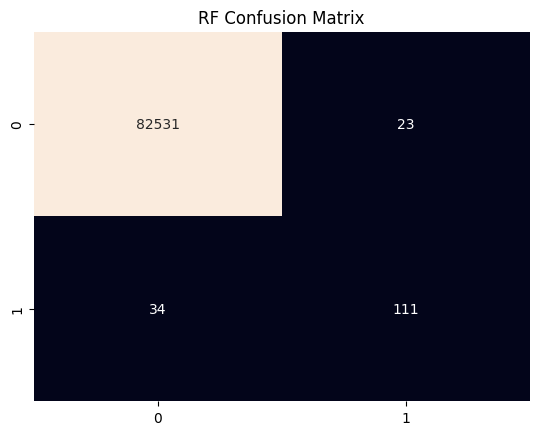

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
cm = confusion_matrix(y_test, rforest_predt)

# Create the heatmap with a light blue colormap
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, rforest_predt)
recall = recall_score(y_test, rforest_predt)
f1 = f1_score(y_test, rforest_predt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.83, Recall: 0.77, F1 Score: 0.80


- Balanced Performance: The third model seems to have achieved a good balance between precision and recall compared to the first two models.
- Hyperparameter Tuning: The adjustments made in the hyperparameters have likely led to this improved balance.
- While not having the highest recall or precision, it offers a good compromise between minimizing false alarms and catching more fraud.
- Imbalanced Data: The high accuracy is still influenced by the imbalanced data, but the model's performance on the fraud class is noteworthy

### Implementing the Xgboost model:

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(
    max_depth=6,                # Depth of trees; deeper trees can capture more patterns but may overfit
    n_estimators=300,           # Number of boosting rounds, controls the number of trees
    learning_rate=0.1,          # Step size for each boosting step; lower value helps prevent overfitting
    scale_pos_weight=300,       # Balances the weight of positive class to handle imbalance (adjust based on class ratio)
    subsample=0.8,              # Fraction of samples used per tree to prevent overfitting
    colsample_bytree=0.8,       # Fraction of features used per tree
    objective='binary:logistic',# Set to binary classification with logistic output
    eval_metric='auc',          # Good metric for imbalanced datasets
    use_label_encoder=False,    # Disable label encoding warning
    random_state=42             # For reproducibility
)

xgbc.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:28:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgbc_predt = xgbc.predict(X_test)

- **Accuracy:** 0.9996 - The highest accuracy among all the models considered so far.
- **F1 Score:** 0.87 - The highest F1 score among all models, indicating the best overall performance in balancing precision and recall.
- **Precision:** 0.94 - Out of all transactions predicted as fraudulent, 94% were actually fraudulent. This is very high, and similar to the first Random Forest model.
- **Recall:** 0.80 - The model correctly identified 80% of the actual fraudulent transactions. This is higher than both the first and third Random Forest models, and lower than only the second.

In [ ]:
from sklearn import metrics
print('Accuracy score for XGBoost model :',metrics.accuracy_score(y_test, xgbc_predt))
print('F1 score for XGBoost model :', metrics.f1_score(y_test, xgbc_predt))

Accuracy score for XGBoost model : 0.9995646863928221
F1 score for XGBoost model : 0.8656716417910447


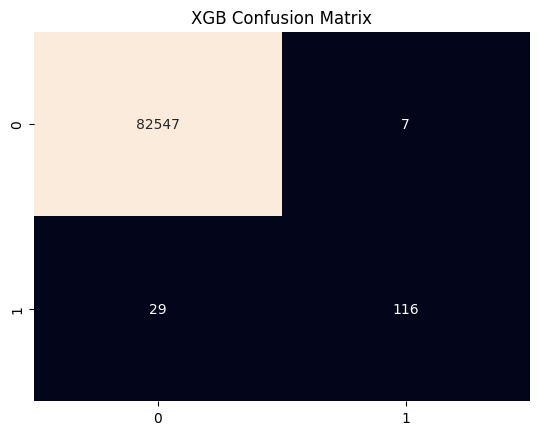

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, xgbc_predt)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('XGB Confusion Matrix')
plt.savefig('XGB_con_mat')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, xgbc_predt)
recall = recall_score(y_test, xgbc_predt)
f1 = f1_score(y_test, xgbc_predt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")


Precision: 0.94, Recall: 0.80, F1 Score: 0.87


- Excellent Performance: The XGBoost model demonstrates excellent performance across all metrics. It has the highest accuracy and F1 score, indicating a strong ability to classify both normal and fraudulent transactions effectively.
- Balanced Precision and Recall: The model achieves a good balance between precision and recall, minimizing false alarms while still catching a large proportion of fraudulent transactions.
- Focus on Fraud Detection: The high recall is particularly valuable in fraud detection, ensuring that fewer fraudulent transactions are missed.

In [ ]:
# from xgboost import XGBClassifier

# xgbc = XGBClassifier(
#     n_estimators=200,  # Increased for better performance
#     max_depth=7,        # Slightly deeper to capture more complex patterns
#     learning_rate=0.05, # Reduced for better convergence
#     subsample=0.8,      # Use 80% of data for each tree (helps prevent overfitting)
#     colsample_bytree=0.8,  # Use 80% of features for each tree (helps prevent overfitting)
#     gamma=0.5,          # Moderate regularization to prevent overfitting
#     scale_pos_weight=25,  # Increased to give more weight to the minority class
#     random_state=42     # For reproducibility
# )

# xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
# xgbc_predt = xgbc.predict(X_test)

In [ ]:
# from sklearn import metrics
# print('Accuracy score for XGBoost model :',metrics.accuracy_score(y_test, xgbc_predt))
# print('F1 score for XGBoost model :', metrics.f1_score(y_test, xgbc_predt))

Accuracy score for XGBoost model : 0.999576778437466
F1 score for XGBoost model : 0.8679245283018868


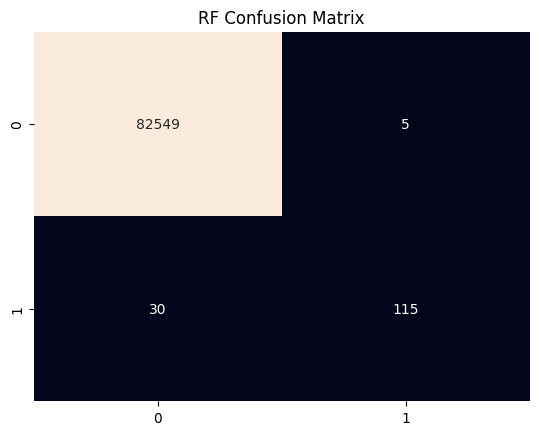

In [ ]:
# import seaborn as sns
# cm = confusion_matrix(y_test, xgbc_predt)
# sns.heatmap(cm, annot=True, fmt="d", cbar=False)
# plt.title('RF Confusion Matrix')
# plt.savefig('rf_con_mat')
# plt.show()

In [ ]:
# from sklearn.metrics import precision_score, recall_score, f1_score

# precision = precision_score(y_test, xgbc_predt)
# recall = recall_score(y_test, xgbc_predt)
# f1 = f1_score(y_test, xgbc_predt)

# print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.96, Recall: 0.79, F1 Score: 0.87


### Implimenting the Decision tree model

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(
    criterion='gini',  # Use Gini impurity to measure the quality of a split
    max_depth=6,      # Limit the maximum depth of the tree to 6 levels to prevent overfitting
    min_samples_split=10, # Require at least 10 samples to split an internal node
    min_samples_leaf=4,  # Require at least 4 samples to be at a leaf node
    max_features='sqrt', # Consider the square root of the total number of features when looking for the best split

)

dtree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=10)

In [ ]:
# prediction for decision tree model
y_dtree_predt = dtree.predict(X_test)

- **Accuracy:** 0.9992 - Very high accuracy, similar to the other models.
- **F1 Score:** 0.76 - A decent F1 score, but lower than the XGBoost and third Random Forest models.
- **Precision:** 0.85 - Out of all transactions predicted as fraudulent, 85% were actually fraudulent. This is high, but lower than the XGBoost and first Random Forest models.
- **Recall:** 0.68 - The model correctly identified 68% of the actual fraudulent transactions. This is the lowest recall among all models discussed.

In [ ]:
from sklearn import metrics
print('Accuracy score for Decision Tree model :',metrics.accuracy_score(y_test, y_dtree_predt))
print('F1 score for the Decision Tree model :', metrics.f1_score(y_test, y_dtree_predt))

Accuracy score for Decision Tree model : 0.9993107534553017
F1 score for the Decision Tree model : 0.7832699619771863


- **True Negatives (TN):** 82537 - Correctly classified normal transactions.
- **False Positives (FP):** 17 - Incorrectly classified normal transactions as fraudulent. This is low, but higher than the XGBoost and first Random Forest models.
- **False Negatives (FN):** 46 - Incorrectly classified fraudulent transactions as normal. This is the highest number of false negatives among all models discussed.
- **True Positives (TP):** 99 - Correctly classified fraudulent transactions.

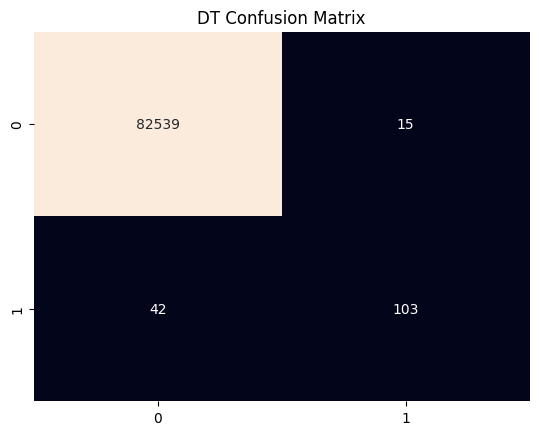

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_dtree_predt)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('DT Confusion Matrix')
plt.savefig('DT_con_mat')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_dtree_predt)
recall = recall_score(y_test, y_dtree_predt)
f1 = f1_score(y_test, y_dtree_predt)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.87, Recall: 0.71, F1 Score: 0.78


- Decent but Not Optimal: The Decision Tree model has decent performance, but it's not as strong as the XGBoost or the best Random Forest model.
- Lower Recall: The main concern is the relatively low recall, indicating that the model is missing a significant number of fraudulent transactions.
- High Precision: The model has high precision, meaning it generates fewer false alarms.
- Simplicity: Decision Trees are known for their simplicity and interpretability, but they might not be the best choice for complex datasets with imbalanced classes.

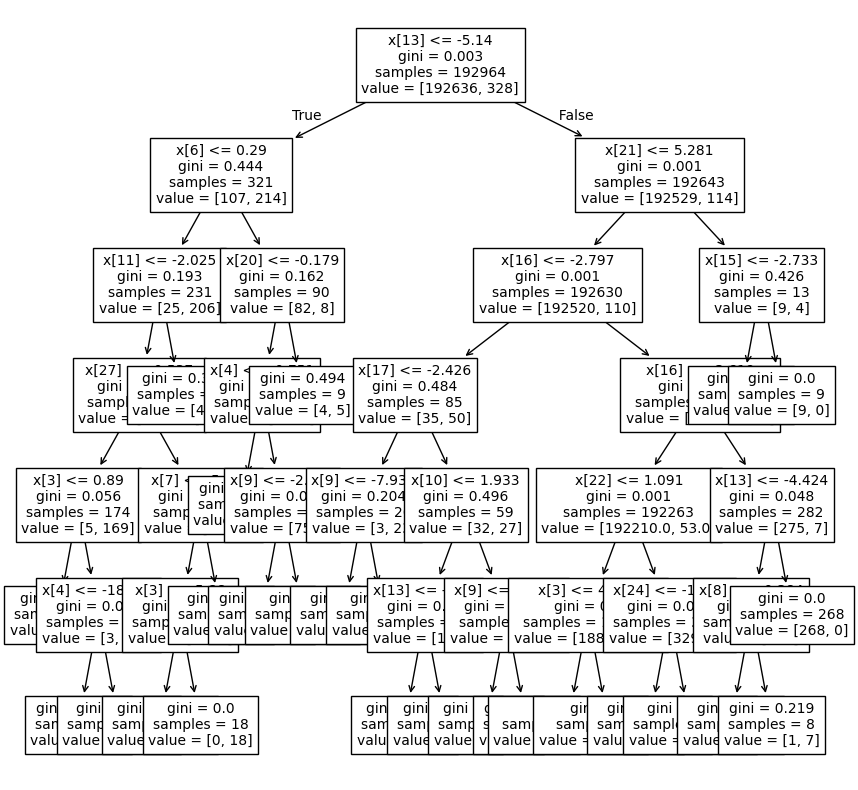

In [ ]:
#Decison tree visualisation
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(dtree, fontsize=10)
plt.show()

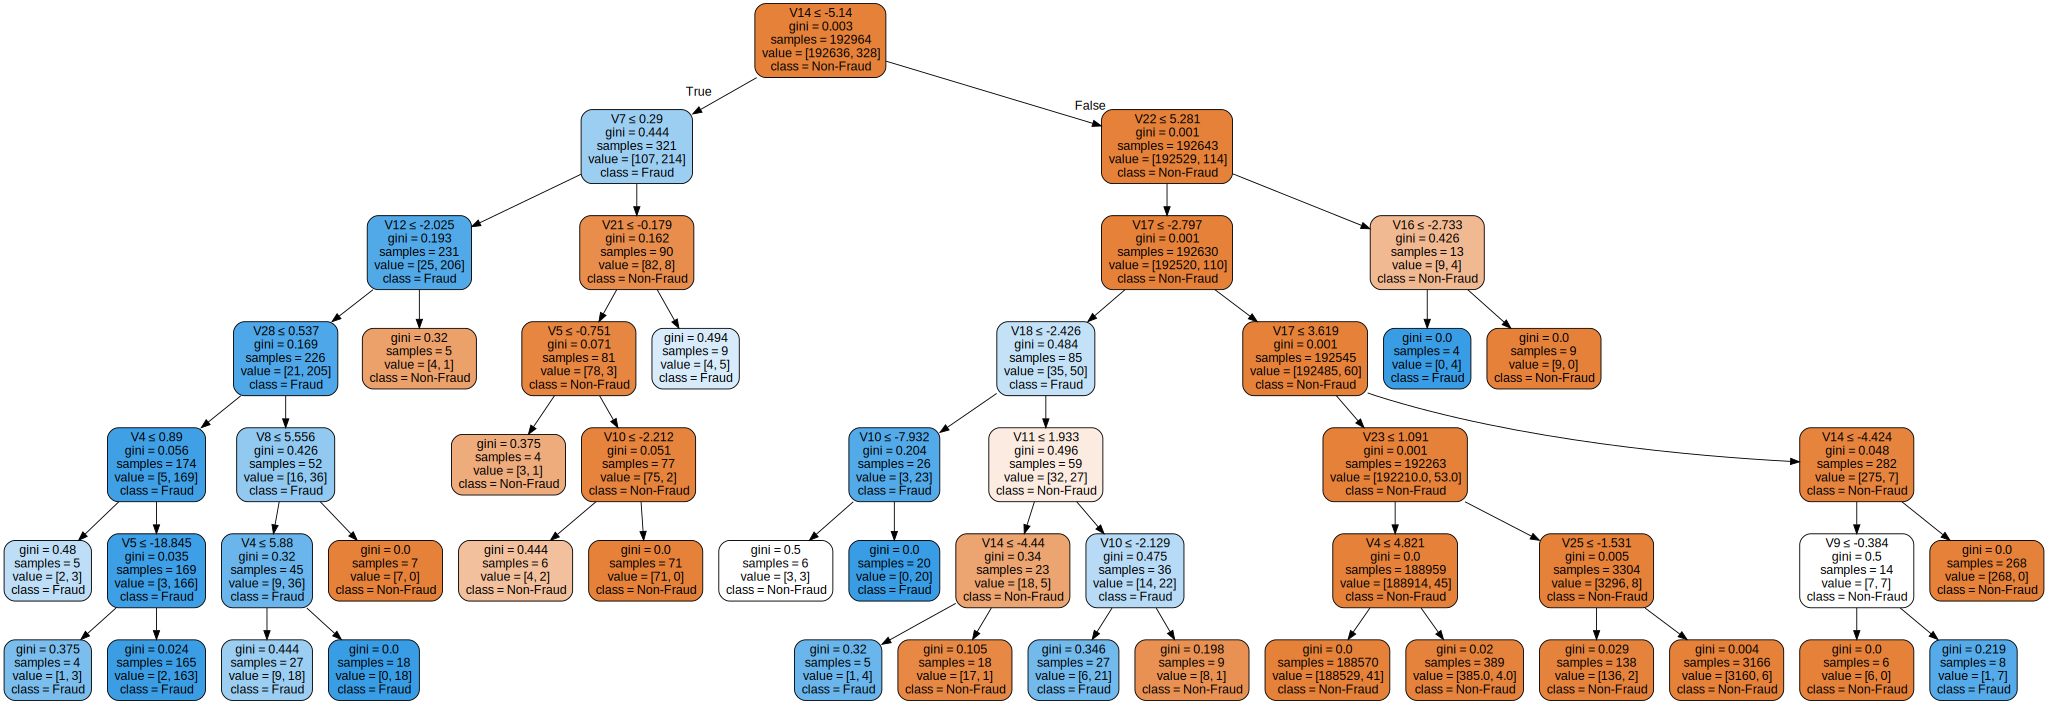

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

X = data.drop('Class', axis=1)  # Keep X as a DataFrame
feature_names = X.columns.tolist()  # Get column names

dot_data = export_graphviz(
    dtree,
    out_file=None,
    feature_names=feature_names,  # Use the stored feature names
    class_names=['Non-Fraud', 'Fraud'],  # Replace with your class names
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
display(graph)

### Some metrics to compare the 4 models:

- ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a metric used to evaluate the performance of binary classification models.
- It measures the ability of the model to distinguish between positive and negative classes by calculating the area under the ROC curve. The ROC curve is a plot of the true positive rate (sensitivity) against the false positive rate (1-specificity) for different classification thresholds.
- A higher ROC AUC score indicates better model performance, with a score of 1.0 representing perfect classification and a score of 0.5 representing random guessing. It's particularly useful when dealing with imbalanced datasets.

In [ ]:
from sklearn.metrics import roc_auc_score

# For SVM
svm_auc = roc_auc_score(y_test, svm_predt)
print(f"SVM ROC AUC Score: {svm_auc:.2f}")

# For Random Forest
rf_auc = roc_auc_score(y_test, rforest_predt)
print(f"Random Forest ROC AUC Score: {rf_auc:.2f}")

# For XGBoost
xgb_auc = roc_auc_score(y_test, xgbc_predt)
print(f"XGBoost ROC AUC Score: {xgb_auc:.2f}")

# For Decision Tree
dt_auc = roc_auc_score(y_test, y_dtree_predt)
print(f"Decision Tree ROC AUC Score: {dt_auc:.2f}")

SVM ROC AUC Score: 0.89
Random Forest ROC AUC Score: 0.88
XGBoost ROC AUC Score: 0.90
Decision Tree ROC AUC Score: 0.86


- The Matthews Correlation Coefficient (MCC) is a balanced measure of the quality of binary and multiclass classifications.
- It takes into account true and false positives and negatives, providing a more reliable score even when the classes are of very different sizes.

In [ ]:
from sklearn.metrics import matthews_corrcoef

# # For SVM
svm_mcc = matthews_corrcoef(y_test, svm_predt)
print(f"SVM MCC: {svm_mcc:.2f}")

# For Random Forest
rf_mcc = matthews_corrcoef(y_test, rforest_predt)
print(f"Random Forest MCC: {rf_mcc:.2f}")

# For XGBoost
xgb_mcc = matthews_corrcoef(y_test, xgbc_predt)
print(f"XGBoost MCC: {xgb_mcc:.2f}")

# For Decision Tree
dt_mcc = matthews_corrcoef(y_test, y_dtree_predt)
print(f"Decision Tree MCC: {dt_mcc:.2f}")

SVM MCC: 0.79
Random Forest MCC: 0.80
XGBoost MCC: 0.87
Decision Tree MCC: 0.79


## Creating a Hybrid model:

***stacking ensemble approach:***



In [ ]:
# # Convert svm_train_pred to a DataFrame and reset the index
# svm_train_pred_df = pd.DataFrame(svm_predt, index=X_train.index, columns=['svm_pred'])

# # Concatenate with the original DataFrame
# X_train_hybrid = pd.concat([X_train, svm_train_pred_df], axis=1)

In [ ]:
# #Add SVM predictions to the test set and evaluate
# X_test_hybrid = X_test.copy()
# svm_test_pred = svm.predict(X_test)
# X_test_hybrid['svm_pred'] = svm_test_pred
# final_pred = xgbc.predict(X_test_hybrid)

In [ ]:
# print(classification_report(y_test, final_pred))

***The Voting Classifier approach:***

In [ ]:
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import time

In [ ]:
# Create hybrid model using voting classifier
hybrid_model = VotingClassifier(
    estimators=[
        ('svm', svm),
        ('xgb', xgbc)
    ],
    voting='soft',  # Use probability predictions
    weights=[1, 1]  # Equal weights for both models
)

In [ ]:
# Train the hybrid model
print("Training hybrid model...")
start_time = time.time()
hybrid_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f"Training completed in {training_time:.2f} seconds")


Training hybrid model...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:37:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training completed in 3590.42 seconds


In [ ]:
y_pred_hy = hybrid_model.predict(X_test)

- Accuracy: 0.9995 - Very high accuracy, similar to the XGBoost model.
- F1 Score: 0.85 - A good F1 score, indicating a decent balance between precision and recall.

In [ ]:
# Calculate and print metrics
accuracy = accuracy_score(y_test, y_pred_hy)
f1 = f1_score(y_test, y_pred_hy)

print("\nModel Performance Metrics:")
print(f"Accuracy Score: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")



Model Performance Metrics:
Accuracy Score: 0.9995
F1 Score: 0.8506


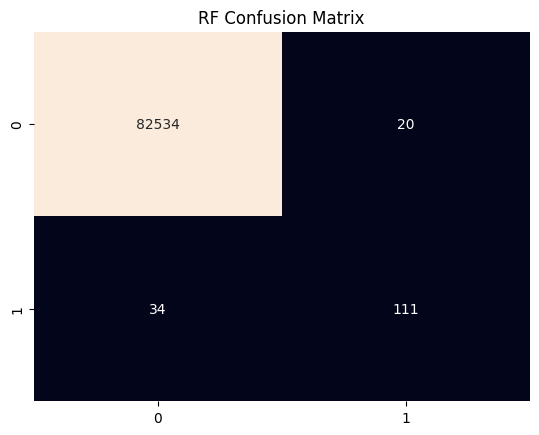

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_hy)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('hybrid Confusion Matrix')
plt.savefig('hy_con_mat')
plt.show()

**Interpretation and Improvement:**

- Improved F1 Score: The hybrid model shows a noticeable improvement in the F1 score compared to the standalone SVM model. This indicates a better balance between precision and recall.
- Similar Accuracy: The accuracy remains very high and comparable to the standalone SVM.
- Potential for Enhanced Recall: While we don't have the precision and recall values for the hybrid model, the improved F1 score suggests a potential increase in recall, which is crucial for fraud detection.  

**Did the Hybrid Model Improve SVM Performance?**

Yes, based on the F1 score, the hybrid model with the Voting Classifier method appears to have improved the performance of the standalone SVM model. The improvement is primarily due to the ensemble approach, where combining the predictions of SVM and XGBoost leads to a more robust and balanced performance.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_hy)
recall = recall_score(y_test, y_pred_hy)
f1 = f1_score(y_test, y_pred_hy)

print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}")

Precision: 0.85, Recall: 0.77, F1 Score: 0.80


***Using Voting Classifier approach and anomaly detection to improve fraud detection only:***

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train OneClassSVM on non-fraud data only
ocsvm = OneClassSVM(nu=0.05, kernel="rbf", gamma=0.05)  # Adjust `nu` and `gamma` based on results
X_train_non_fraud = X_train_scaled[y_train == 0]
ocsvm.fit(X_train_non_fraud)


OneClassSVM(gamma=0.05, nu=0.05)

In [ ]:
from xgboost import XGBClassifier

xgbc = XGBClassifier(
    max_depth=6,                # Depth of trees; deeper trees can capture more patterns but may overfit
    n_estimators=300,           # Number of boosting rounds, controls the number of trees
    learning_rate=0.1,          # Step size for each boosting step; lower value helps prevent overfitting
    scale_pos_weight=300,       # Balances the weight of positive class to handle imbalance (adjust based on class ratio)
    subsample=0.8,              # Fraction of samples used per tree to prevent overfitting
    colsample_bytree=0.8,       # Fraction of features used per tree
    objective='binary:logistic',# Set to binary classification with logistic output
    eval_metric='auc',          # Good metric for imbalanced datasets
    use_label_encoder=False,    # Disable label encoding warning
    random_state=42
)

xgbc.fit(X_train_scaled, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [20:58:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

def hybrid_predict(X_test_scaled):
    # SVM predictions (anomaly detection)
    svm_anomaly_pred = ocsvm.predict(X_test_scaled)

    # Convert SVM anomaly output to binary fraud prediction
    # In OneClassSVM, -1 indicates an anomaly (fraud), and 1 indicates normal (non-fraud)
    svm_fraud_pred = np.where(svm_anomaly_pred == -1, 1, 0)

    # XGBoost predictions for general classification
    xgb_pred = xgbc.predict(X_test_scaled)

    # Initialize hybrid predictions with XGBoost's results
    hybrid_pred = np.copy(xgb_pred)

    # Override XGBoost's predictions with SVM's for flagged fraud cases
    hybrid_pred[svm_fraud_pred == 1] = 1

    return hybrid_pred

# Predict and evaluate the custom hybrid model
y_pred_hybrid = hybrid_predict(X_test_scaled)
print(classification_report(y_test, y_pred_hybrid))
print(confusion_matrix(y_test, y_pred_hybrid))


              precision    recall  f1-score   support

           0       1.00      0.95      0.97     82554
           1       0.03      0.88      0.06       145

    accuracy                           0.95     82699
   macro avg       0.51      0.91      0.51     82699
weighted avg       1.00      0.95      0.97     82699

[[78223  4331]
 [   18   127]]


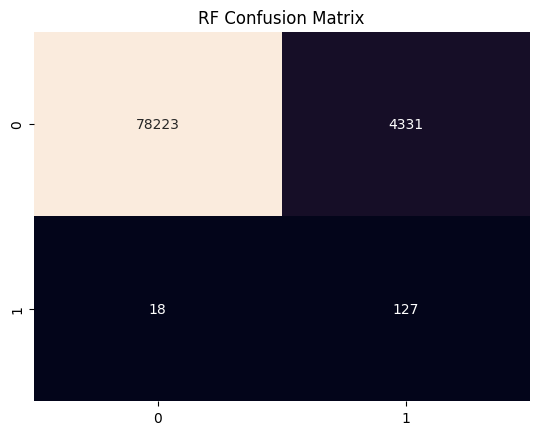

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_hybrid)
sns.heatmap(cm, annot=True, fmt="d", cbar=False)
plt.title('RF Confusion Matrix')
plt.savefig('rf_con_mat')
plt.show()